In [ ]:
%run preprocess.ipynb

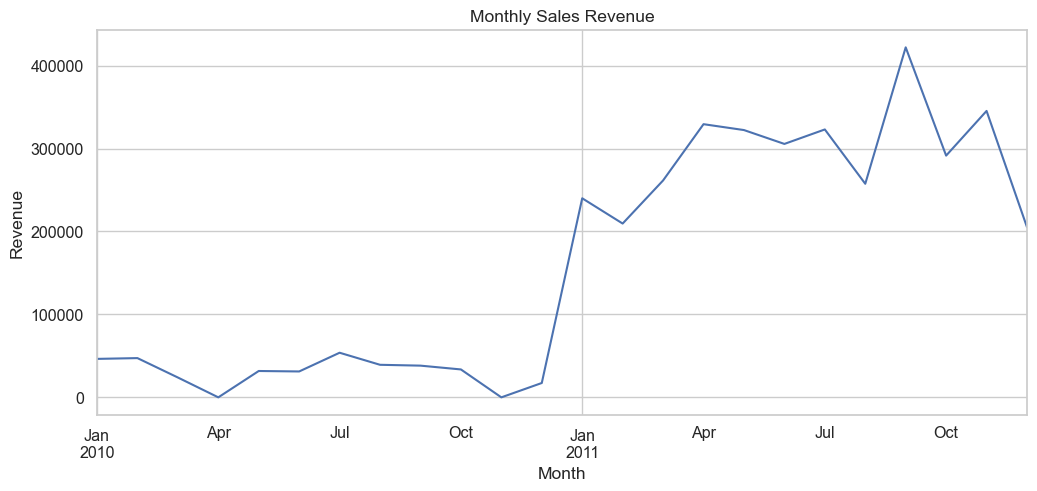

In [5]:
monthly_sales = df.resample("M", on="InvoiceDate")["Amount"].sum()
plt.figure(figsize=(12,5))
monthly_sales.plot()
plt.title("Monthly Sales Revenue")
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.grid(True)
plt.show()

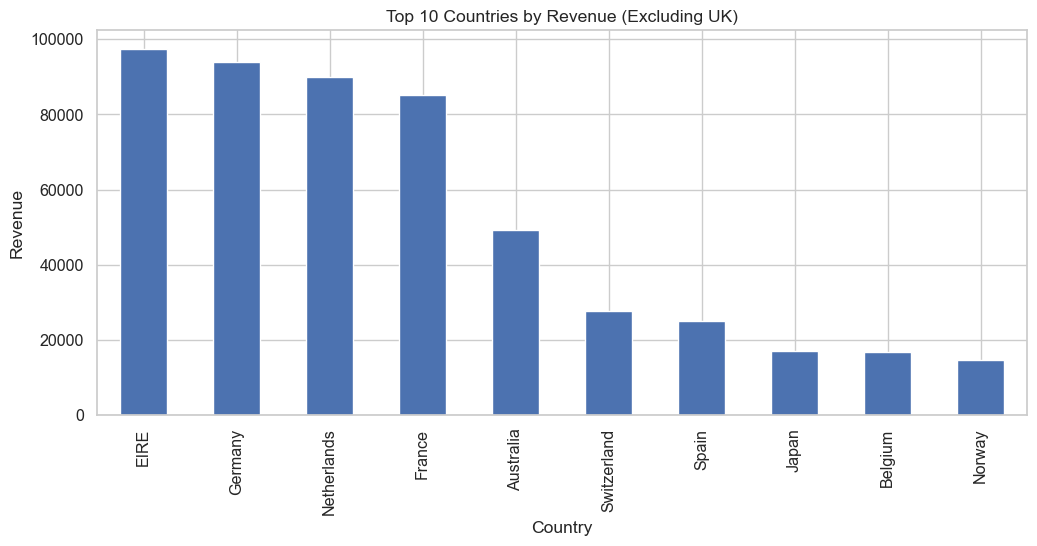

In [6]:
country_revenue = df.groupby("Country")["Amount"].sum().sort_values(ascending=False)
plt.figure(figsize=(12,5))
country_revenue[1:11].plot(kind="bar")
plt.title("Top 10 Countries by Revenue (Excluding UK)")
plt.ylabel("Revenue")
plt.show()

In [11]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34


In [23]:
df.shape

(168631, 9)

In [28]:
df['Amount'].unique().shape

(2129,)

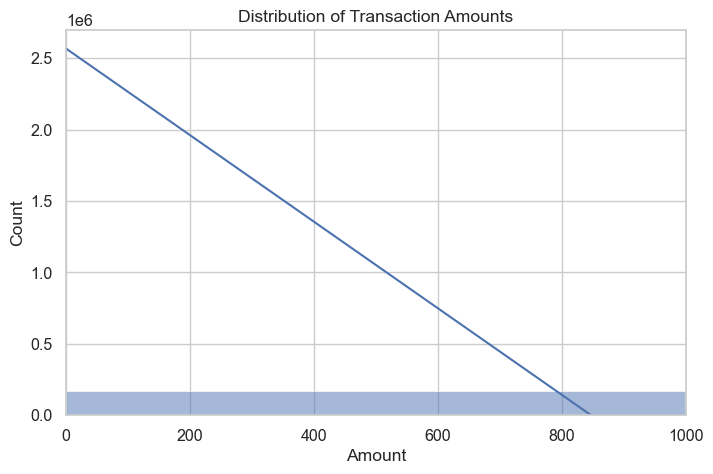

In [30]:
plt.figure(figsize=(8,5))
sns.histplot(df["Amount"], bins=100, kde=True)
plt.xlim(0, 1000)  # limit to see distribution clearly
plt.title("Distribution of Transaction Amounts")
plt.show()

In [31]:
ref_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)
print(ref_date)

2011-12-11 17:19:00


In [ ]:
# Recency
recency = df.groupby("CustomerID")["InvoiceDate"].max().reset_index()
recency["Recency"] = (ref_date - recency["InvoiceDate"]).dt.days

In [ ]:
# Frequency 
frequency = df.groupby("CustomerID")["InvoiceNo"].nunique().reset_index()
frequency.rename(columns={"InvoiceNo":"Frequency"}, inplace=True)

In [35]:
# Monetary
monetary = df.groupby("CustomerID")["Amount"].sum().reset_index()
monetary.rename(columns={"Amount":"Monetary"}, inplace=True)

In [36]:
rfm = recency.merge(frequency, on="CustomerID").merge(monetary, on="CustomerID")
rfm.head()

,CustomerID,InvoiceDate,Recency,Frequency,Monetary
0,12347,2011-09-06 13:01:00,96,5,2540.29
1,12348,2011-05-04 10:47:00,221,1,367.00
2,12350,2011-02-02 16:01:00,312,1,334.40
3,12352,2011-03-11 14:37:00,275,3,1296.38
4,12355,2011-09-05 13:49:00,97,1,459.40


In [37]:
rfm.shape

(2997, 5)

In [39]:
rfm_log = rfm[["Recency","Frequency","Monetary"]].apply(np.log1p)


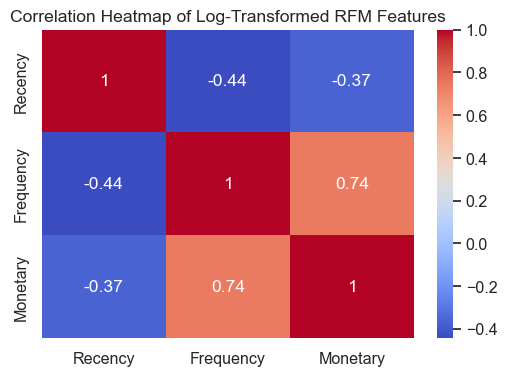

In [40]:
plt.figure(figsize=(6,4))
sns.heatmap(rfm_log.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Log-Transformed RFM Features")
plt.show()

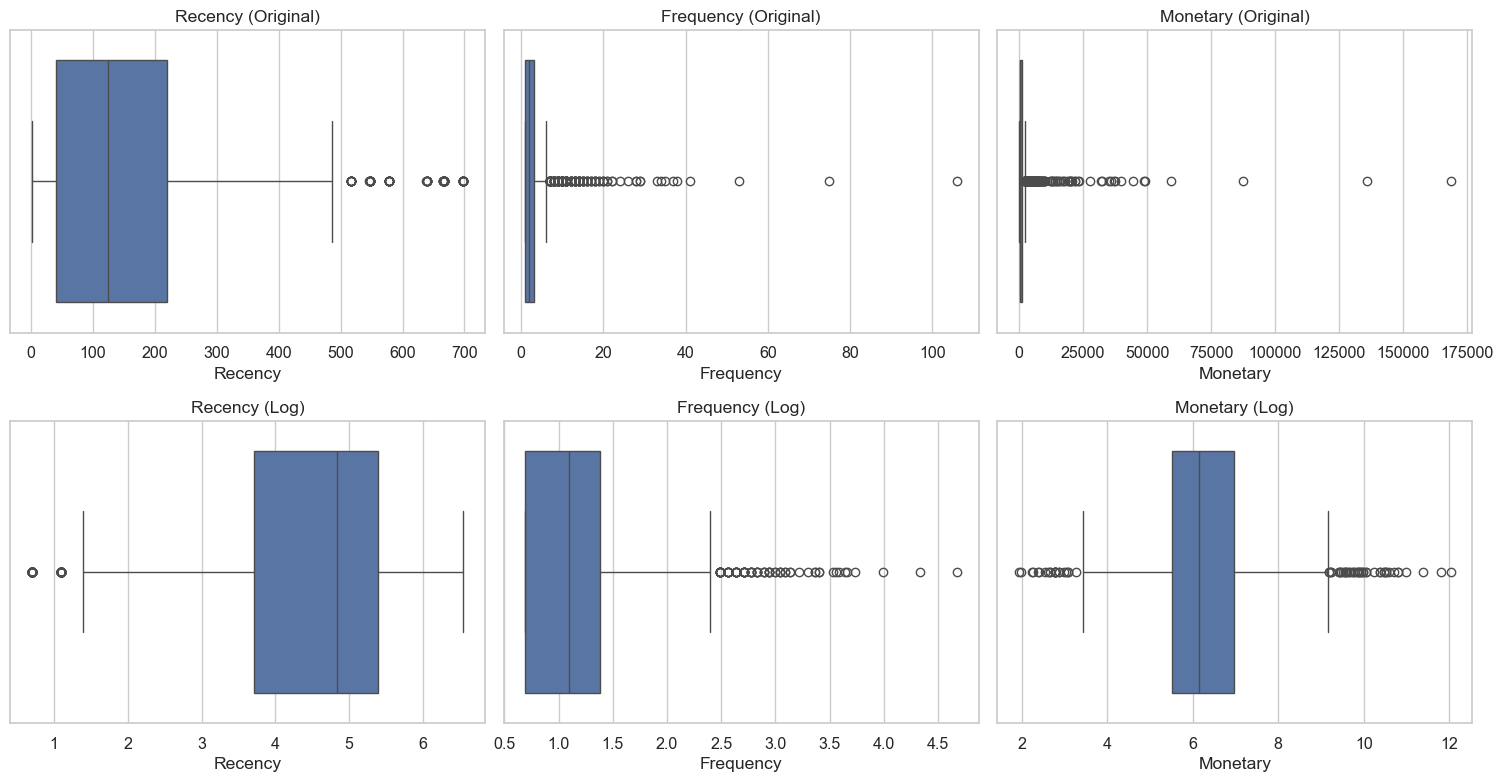

In [41]:
fig, axes = plt.subplots(2, 3, figsize=(15,8))

sns.boxplot(x=rfm["Recency"], ax=axes[0,0]); axes[0,0].set_title("Recency (Original)")
sns.boxplot(x=rfm["Frequency"], ax=axes[0,1]); axes[0,1].set_title("Frequency (Original)")
sns.boxplot(x=rfm["Monetary"], ax=axes[0,2]); axes[0,2].set_title("Monetary (Original)")

sns.boxplot(x=rfm_log["Recency"], ax=axes[1,0]); axes[1,0].set_title("Recency (Log)")
sns.boxplot(x=rfm_log["Frequency"], ax=axes[1,1]); axes[1,1].set_title("Frequency (Log)")
sns.boxplot(x=rfm_log["Monetary"], ax=axes[1,2]); axes[1,2].set_title("Monetary (Log)")

plt.tight_layout()
plt.show()

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)

In [62]:
cleaned_rfm = pd.DataFrame(rfm, columns=["Recency", "Frequency", "Monetary"])
cleaned_rfm.head()

,Recency,Frequency,Monetary
0,96,5,2540.29
1,221,1,367.00
2,312,1,334.40
3,275,3,1296.38
4,97,1,459.40


In [63]:
#save rfm as csv
cleaned_rfm.to_csv("cleaned_rfm.csv", index=False)